<h1 style="color:green" align="center">Implement Gradient Descent For Neural Network (or Logistic Regression)</h1>

<h4 style="color:blue">Predicting if a person would buy life insurnace based on his age using logistic regression</h4>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Akash\Machine Learning\Data_for_ML\insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [4]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**

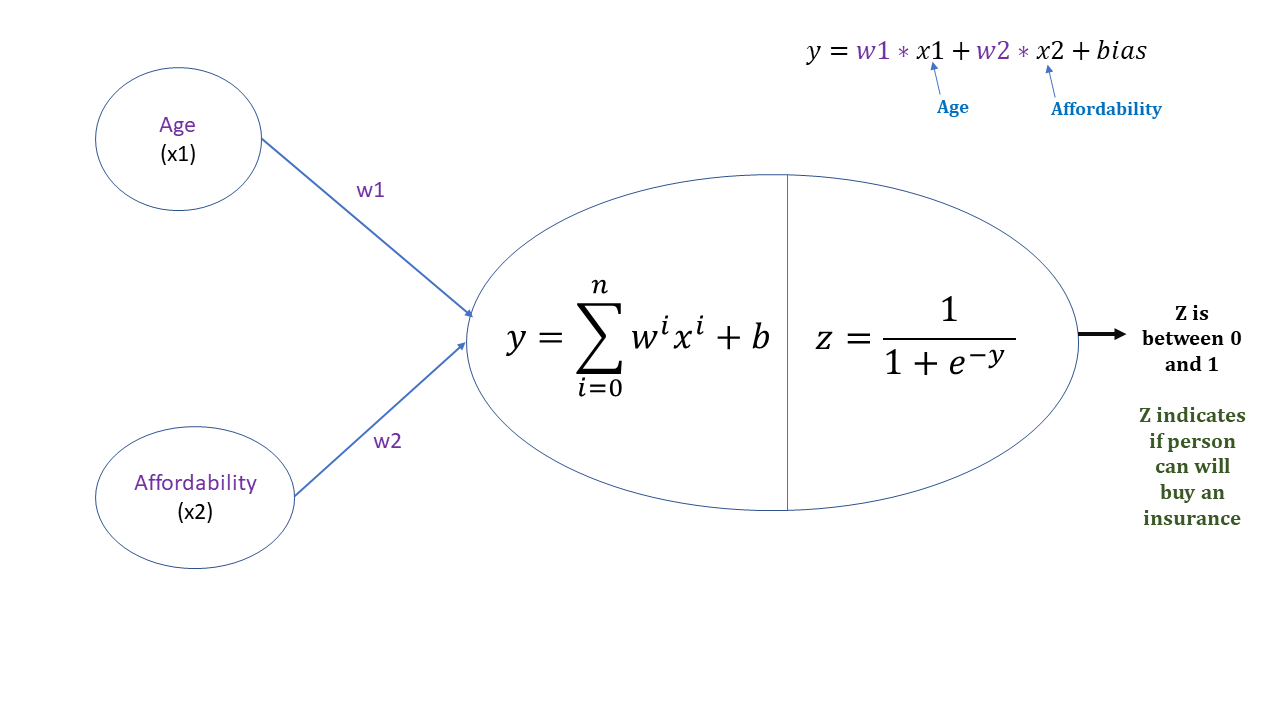

In [5]:
from IPython.display import Image
Image(filename='D:\Akash\Machine Learning\Data_for_ML\\neuron.jpg')

In [6]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 828ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/2000
1/

**Evaluate the model on test set**

In [7]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 1s 639ms/step - loss: 0.5147 - accuracy: 0.6667


[0.5147145390510559, 0.6666666865348816]

In [8]:
model.predict(X_test_scaled)

array([[0.66107017],
       [0.51496315],
       [0.32312697],
       [0.5669931 ],
       [0.67040366],
       [0.7234578 ]], dtype=float32)

In [9]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [10]:
coef, intercept = model.get_weights()

In [11]:
coef, intercept

(array([[2.097229 ],
        [0.9670873]], dtype=float32),
 array([-1.284718], dtype=float32))

**This means w1=2.097229 , w2=0.9670873, bias =-1.284718**